<a href="https://colab.research.google.com/github/god-of-north/highload-homework-18/blob/main/homework18.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework Highload:Projector #18

### BST and Counting Sort 

- Implement class for Balanced Binary Search Tree that can insert, find and delete elements.
- Generate 100 random datasets and measure complexity
- Implement Counting Sort algorithm
- Figure out when Counting Sort doesn’t perform.


Requirements and testing function

In [ ]:
!pip install bintrees

import numpy as np
import time
import matplotlib.pyplot as plt
from random import randint
from bintrees import BinaryTree 


def test(func):
    start_time = time.time()
    func()
    return (time.time() - start_time)


## Counting Sort

Counting sort algorithm

In [ ]:
def countingSort(array, k):
    size = len(array)
    output = [0] * size
    count = [0] * (k+1)

    for i in range(0, size):
        count[array[i]] += 1

    for i in range(1, k):
        count[i] += count[i - 1]

    i = size - 1
    while i >= 0:
        output[count[array[i]] - 1] = array[i]
        count[array[i]] -= 1
        i -= 1

    return output

Sorting array of random integers where k == n

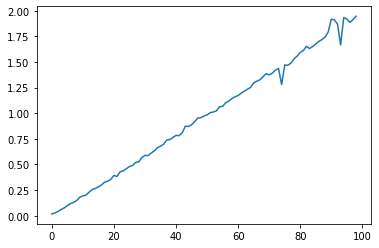

In [ ]:
# k == n
labels = []
vals = []
for i in range(1,100): 
    n = i*10000
    data = np.random.randint(0, n, n)
    t = test(lambda: countingSort(data, k=n))

    vals.append(t)
    labels.append(n)

plt.plot(range(len(vals)), vals)
plt.show()


Sorting array of random integers where k == n, values in the array are not repeated

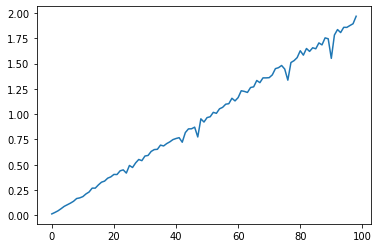

In [ ]:
# k == n distinct
labels = []
vals = []
for i in range(1,100): 
    n = i*10000
    k = n
    data = np.random.default_rng().choice(k, size=n, replace=False)
    t = test(lambda: countingSort(data, k=k))

    vals.append(t)
    labels.append(n)

plt.plot(range(len(vals)), vals)
plt.show()



Sorting pre-sorted (asc) array of random integers where k == n

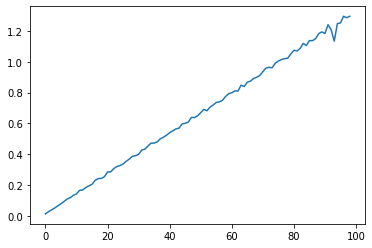

In [ ]:
# k == n asc
labels = []
vals = []
for i in range(1,100): 
    n = i*10000
    k = n
    data = np.random.randint(0, k, n)
    data.sort()
    t = test(lambda: countingSort(data, k=k))

    vals.append(t)
    labels.append(n)

plt.plot(range(len(vals)), vals)
plt.show()



Sorting pre-sorted (desc) array of random integers where k == n

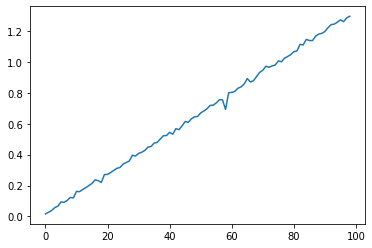

In [ ]:
# k == n desc
labels = []
vals = []
for i in range(1,100): 
    n = i*10000
    k = n
    data = np.random.randint(0, k, n)
    data[::-1].sort()
    t = test(lambda: countingSort(data, k=k))

    vals.append(t)
    labels.append(n)

plt.plot(range(len(vals)), vals)
plt.show()



Sorting array of random integers where k == 10

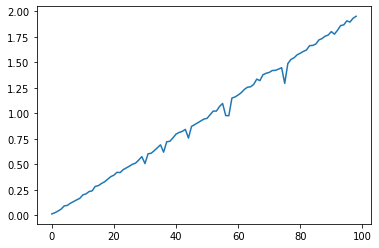

In [ ]:
# k == 10
labels = []
vals = []
for i in range(1,100): 
    n = i*10000
    k = n
    data = np.random.randint(0, k, n)
    t = test(lambda: countingSort(data, k=k))

    vals.append(t)
    labels.append(n)

plt.plot(range(len(vals)), vals)
plt.show()


## BST Tree

Dataset generation. Non-repetable random integers

In [ ]:
def gen_dataset():
    print('Data generation: ', end='')
    dataset = []
    for i in range(1, 100):
        n = i*100
        dataset.append(np.random.default_rng().choice(0x7FFFFFF0, size=n, replace=False))
        print('.', end = '')
    print('done')
    return dataset


Sorting for ballancing BST

In [ ]:
def ballanced_sort(array):
  array.sort()

  out_idx = []

  ranges = [(0,len(array)-1)]

  while len(out_idx)<len(array):
    rtemp = []
    for r in ranges:
      length = (r[1]-r[0])+1
      if length == 1:
        out_idx.append(r[0])
      elif length == 2:
        out_idx.append(r[0])
        out_idx.append(r[1])
      else:
        i = (int)(r[0]+(length/2))
        out_idx.append(i)
        rtemp.append((r[0], i-1))
        rtemp.append((i+1, r[1]))
    ranges = rtemp

  out = []
  for i in out_idx:
    out.append(array[i])
  
  return out

Creating BST Trees

In [ ]:
dataset = gen_dataset()

ins_balanced = []
ins_broken = []
ins_normal = []

def ins_data(bst, data):
    for x in data:
        bst.insert(x, x)
    return bst


normal_bst = []
balanced_bst = []
broken_bst = []
for data in dataset:
    print('+', end = '')

    bst = BinaryTree()
    t = test(lambda: ins_data(bst, data))
    normal_bst.append(bst)
    ins_normal.append(t)

    print('@', end = '')

    data.sort()
    bst = BinaryTree()
    t = test(lambda: ins_data(bst, data))
    broken_bst.append(bst)
    ins_broken.append(t)

    print('$', end = '')

    data = ballanced_sort(data)
    bst = BinaryTree()
    t = test(lambda: ins_data(bst, data))
    balanced_bst.append(bst)
    ins_balanced.append(t)

    print('#', end = '')


### Insertion into BST

Insertion of an unsorted array

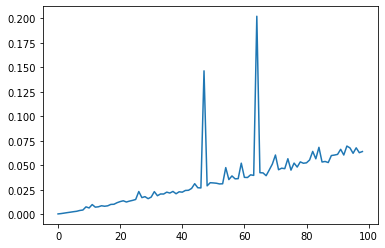

In [ ]:
plt.plot(range(len(ins_balanced)), ins_normal)
plt.show()

Insertion of an sorted array

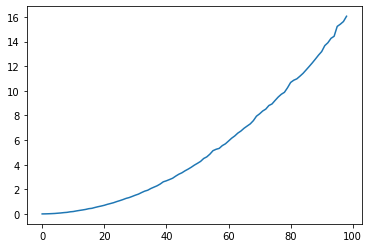

In [ ]:
plt.plot(range(len(ins_broken)), ins_broken)
plt.show()

Insertion of an array with ballanced sorting

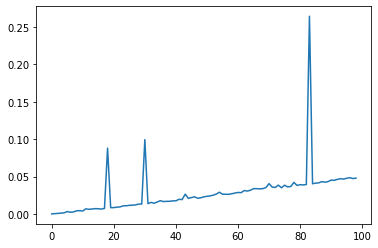

In [ ]:
plt.plot(range(len(ins_balanced)), ins_balanced)
plt.show()

### Searching inside BST

Searching function

In [ ]:
def search_in_bst(bst_tree):
  
  def get_all(bst, keys):
    for k in keys:
      bst.get(k)
  
  vals = []
  for bst in bst_tree:
    t = test(lambda: get_all(bst, [k for k in bst.keys()]))
    vals.append(t)

  plt.plot(range(len(vals)), vals)
  plt.show()

Normal

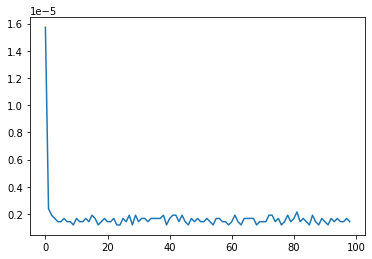

In [ ]:
search_in_bst(normal_bst)

Pre-sorted

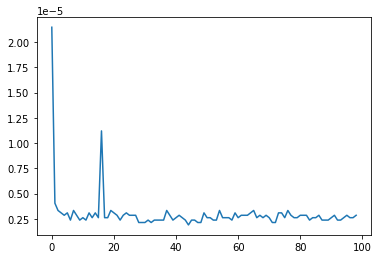

In [ ]:
search_in_bst(broken_bst)

Balanced

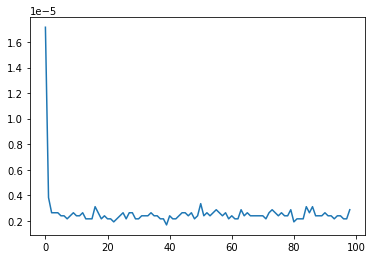

In [ ]:
search_in_bst(balanced_bst)

### Removing from BST

Removing function

In [ ]:
def rem_bst(bst_tree):
  vals = []
  for bst in bst_tree:
    t = test(lambda: bst.remove_items([k for k in bst.keys()]))
    vals.append(t)

  plt.plot(range(len(vals)), vals)
  plt.show()    

Removing BST with random filling

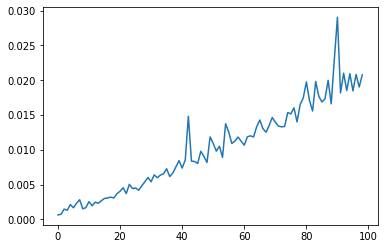

In [ ]:
rem_bst(normal_bst)

Removing from BST with ballanced filling

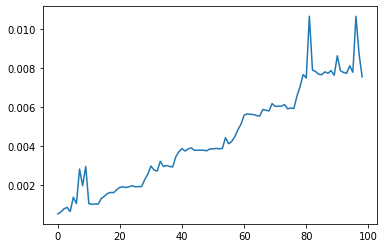

In [ ]:
rem_bst(balanced_bst)

Removing from BST with sorted array filling

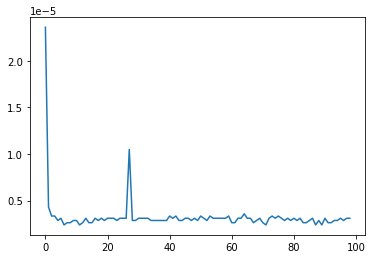

In [ ]:
rem_bst(broken_bst)